# An example of data mining course

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. <br/> Anaconda provides a simple double-click installer for your convenience.


The main libraries that the notebook will use are:

* [**numpy**](http://www.numpy.org/): Provides a fast numerical array structure and helper functions
* [**pandas**](http://pandas.pydata.org/): Provides a DataFrame structure to store data in memory and work with it easily and efficiently
* [**scikit-learn**](http://scikit-learn.org/stable/): The essential Machine Learning package in Python
* [**matplotlib**](http://matplotlib.org/): Basic plotting library in Python; most other Python plotting libraries are built on top of it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

*You can [Customize plots with style sheets](http://matplotlib.org/users/style_sheets.html) if needed.*

In [2]:
# Customizing plots with style 
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
plt.style.use('ggplot')

# 0. Warm up

In [3]:
a = [1, 3, 5, 7, 9]
b = [2, 4, 6, 8, 10]

na = np.array(a)
nb = np.array(b)

# print (a*b) # -> will get error that "TypeError: can't multiply sequence by non-int of type 'list'"
print ('na*nb: ', na*nb)
print ('na@nb: ', na@nb)#若是1-dimension -> 內積
print ('mean: ', np.mean(a))
print ('std: ', np.std(a))

# You can use np.[TAB] to get more functions

na*nb:  [ 2 12 30 56 90]
na@nb:  190
mean:  5.0
std:  2.82842712475


In [4]:
na = np.array([[1, 2, 3], [4, 5, 6]])
nb = np.array([[7, 8, 9], [10, 11, 12]])

print('na: \n', na)
print('na.T: \n', na.T)
print('na*nb: \n', na * nb)
print('na@nb.T: \n', na @ nb.T)#矩陣乘法
print('na@nb.T: \n', na @ nb.T)

na: 
 [[1 2 3]
 [4 5 6]]
na.T: 
 [[1 4]
 [2 5]
 [3 6]]
na*nb: 
 [[ 7 16 27]
 [40 55 72]]
na@nb.T: 
 [[ 50  68]
 [122 167]]
na@nb.T: 
 [[ 50  68]
 [122 167]]


In [5]:
df = pd.DataFrame([['Paul', 'M', 18], ['Jean', 'F', 33], ['Tom', 'M', 35], ['Tony', 'M', 33], ['Amy', 'F', 21], ['Lisa', 'F', 20]])
df.columns=['Name', 'Gender', 'Age']
df

,Name,Gender,Age
0,Paul,M,18
1,Jean,F,33
2,Tom,M,35
3,Tony,M,33
4,Amy,F,21
5,Lisa,F,20


x1 [ 0.66592149  0.80085372  0.48304396  0.90296234  0.9833164   0.71081016
  0.67984703  0.80951506  0.26098263  0.8010993 ]
x2 [ 0.43865156  0.49964521  0.85498598  0.98834517  0.77588855  0.52868709
  0.5033497   0.94444442  0.86170674  0.7123043 ]


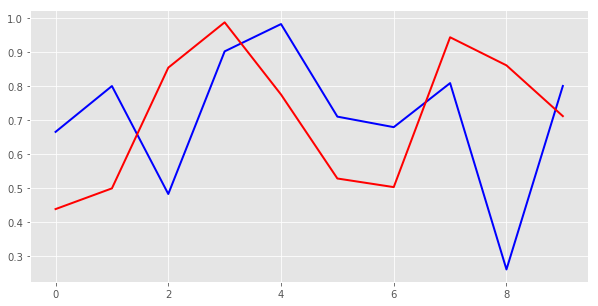

In [6]:
x1 = np.random.uniform(0,1,size=10)
x2 = np.random.uniform(0,1,size=10)
print ('x1', x1)
print ('x2', x2)

plt.plot(x1, c='b')# x1, color是藍色
plt.plot(x2, c='r')#x2, color 是紅色
plt.show()

# 1. PM2.5

- Link: [LASS臉書社群](https://www.facebook.com/groups/1607718702812067/) / [LASS Hackpad共筆](https://lass.hackpad.com/LASS-README-DtZ5T6DXLbu)

<img src="img/pm25_02_1.png" alt="PM2.5" style="width:600px;">
<img src="img/20151114-123711_U4292_M102804_3e98.png" alt="PM2.5_Level" style="width:800px;">

- <h3> Read by pandas' read_csv function </h3>
> Pandas provides many IO tools including csv, excel, sql, json, etc..  
> We're going to use [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to read the CSV file into DataFrame


In [7]:
pm25_data = pd.read_csv('data/PM2.5/PM2.5_20160911_small.csv')
pm25_data.head(10)#讀前十筆資料
# pm25_data.tail(10)
#s_h0 濕度
#s_t0 溫度
#s_d0 pm2.5
#s_d1 pm10

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
0,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.0,1.0,7.0,28.89,14.0,17.0,83.12
1,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.0,1.0,7.0,28.89,14.0,17.0,83.12
2,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23
5,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23
6,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.0,1.0,7.0,28.73,22.0,28.0,84.68
7,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.0,1.0,7.0,28.73,22.0,28.0,84.68
8,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.0,1.0,7.0,28.78,22.0,28.0,86.07
9,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.0,1.0,7.0,28.78,22.0,28.0,86.07


- <h3> Indexing and Slicing - (Row) </h3>

In [8]:
pm25_data.iloc[3:5]

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23


- <h3> Indexing and Slicing - (Column) </h3>

In [9]:
pm25_data[['datatime','s_d0']].head()

,datatime,s_d0
0,2016-09-10 06:29:18,14.0
1,2016-09-10 06:29:18,14.0
2,2016-09-10 06:30:18,12.0
3,2016-09-10 06:30:18,12.0
4,2016-09-10 06:31:17,17.0


- <h3> How many sensors in this small dataset? </h3>

In [10]:
pm25_data['device_id'].unique()

array(['FT1_041', 'FT1_053', 'FT1_028', 'FT1_031', 'FT1_035', 'FT1_037',
       'FT1_001', 'FT1_063'], dtype=object)

- <h3> Select the record of 'FT1_001' sensor </h3>

In [11]:
FT1_001_data = pm25_data[pm25_data.device_id=='FT1_001']
FT1_001_data.head()

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
14976,FT1_001,2016-09-10 06:29:23,PM25,0.0,0.0,0.0,121.614810,25.040080,10.0,3,...,3262028664,100.0,54581.0,0.0,1.0,10.0,29.3,14.0,14.0,22.6
14977,FT1_001,2016-09-10 06:30:22,PM25,0.0,0.0,0.0,121.614935,25.040073,11.0,3,...,3262088424,100.0,54582.0,0.0,1.0,10.0,29.2,12.0,13.0,21.9
14978,FT1_001,2016-09-10 06:31:22,PM25,0.0,0.0,0.0,121.614858,25.040095,12.0,3,...,3262148184,100.0,54583.0,0.0,1.0,10.0,29.3,22.0,24.0,32.0
14979,FT1_001,2016-09-10 06:32:22,PM25,0.0,0.0,0.0,121.614648,25.040035,11.0,3,...,3262207945,100.0,54584.0,0.0,1.0,10.0,29.3,25.0,25.0,32.5
14980,FT1_001,2016-09-10 06:33:21,PM25,0.0,0.0,0.0,121.614682,25.039790,11.0,3,...,3262267701,100.0,54585.0,0.0,1.0,10.0,29.2,13.0,16.0,30.2


- <h3> Select the record of 'FT1_001' and 'FT1_041' sensor </h3>

In [12]:
FT1_001_data = pm25_data[(pm25_data.device_id=='FT1_001')|(pm25_data.device_id=='FT1_041')]
# FT1_001_data = pm25_data[pm25_data.device_id.isin(['FT1_001', 'FT1_041'])]
FT1_001_data

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
0,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.00,1.0,7.0,28.89,14.0,17.0,83.12
1,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.00,1.0,7.0,28.89,14.0,17.0,83.12
2,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.00,1.0,7.0,28.82,12.0,14.0,83.73
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.00,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.00,1.0,7.0,28.79,17.0,21.0,84.23
5,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.00,1.0,7.0,28.79,17.0,21.0,84.23
6,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.00,1.0,7.0,28.73,22.0,28.0,84.68
7,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.00,1.0,7.0,28.73,22.0,28.0,84.68
8,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.00,1.0,7.0,28.78,22.0,28.0,86.07
9,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.00,1.0,7.0,28.78,22.0,28.0,86.07


- <h3> Generate various summary statistics of sensor's values </h3>

In [13]:
FT1_001_data.describe()
# .count() .mean() .max() etc.

,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,fmt_opt,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
count,3963.0,3963.0,3963.0,3963.000000,3963.000000,3963.000000,3963.0,1119.0,3.963000e+03,3963.0,3963.000000,3963.000000,3963.0,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,0.0,0.0,0.0,121.545301,25.000649,18.209942,3.0,0.0,1.510783e+09,100.0,25279.948019,0.003689,1.0,9.229624,28.128080,9.040373,11.047439,86.137144
std,0.0,0.0,0.0,0.043601,0.024873,14.119142,0.0,0.0,1.119836e+09,0.0,18736.616461,0.051442,0.0,1.048670,3.207835,6.377046,7.631285,19.327293
min,0.0,0.0,0.0,121.517733,24.984813,-12.000000,3.0,0.0,7.653764e+08,100.0,12808.000000,0.000000,1.0,7.000000,25.600000,0.000000,0.000000,1.000000
25%,0.0,0.0,0.0,121.517927,24.985020,9.000000,3.0,0.0,7.955537e+08,100.0,13313.000000,0.000000,1.0,9.000000,26.090000,4.000000,6.000000,85.560000
50%,0.0,0.0,0.0,121.517973,24.985080,15.000000,3.0,0.0,8.255515e+08,100.0,13815.000000,0.000000,1.0,10.000000,26.600000,8.000000,9.000000,93.520000
75%,0.0,0.0,0.0,121.614581,25.039954,25.000000,3.0,0.0,3.269649e+09,100.0,54708.500000,0.000000,1.0,10.000000,28.200000,12.000000,14.000000,95.225000
max,0.0,0.0,0.0,121.615513,25.041038,76.000000,3.0,0.0,3.328845e+09,100.0,55699.000000,1.360000,1.0,10.000000,38.100000,38.000000,49.000000,99.900000


- <h3> Plot the data </h3>
    - **s_d0**: Dust sensor PM2.5
    - **s_d1**: Dust sensor PM10
    - **s_t0**: Temperature sensor

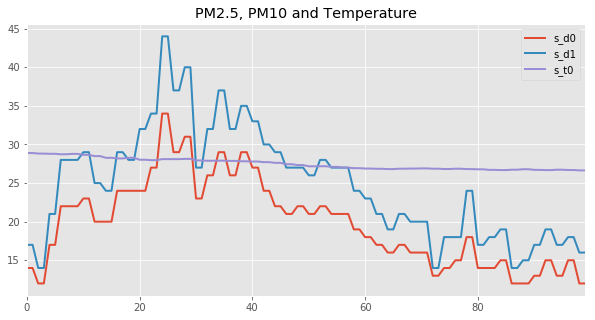

In [14]:
FT1_001_data[['s_d0', 's_d1', 's_t0']][:100].plot(title='PM2.5, PM10 and Temperature')

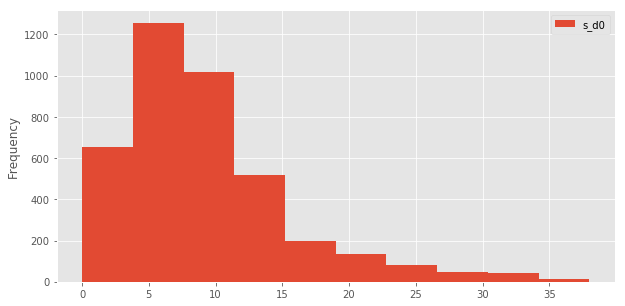

In [15]:
FT1_001_data[['s_d0']].plot(kind='hist', bins=10)

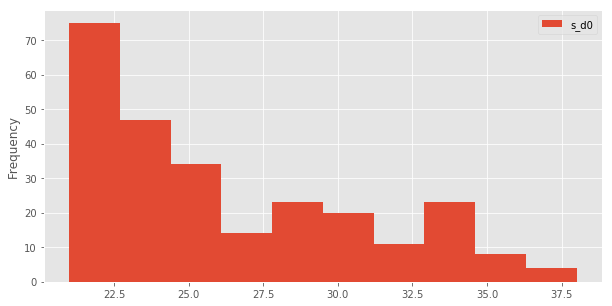

In [16]:
FT1_001_data[FT1_001_data.s_d0 > 20][['s_d0']].plot(kind='hist')

- <h3> Average PM2.5 value of each sensor </h3>

In [17]:
pm25_data.groupby('device_id')['s_d0'].mean()
#將所有device_id相同的gourp起來算mean

device_id
FT1_001    10.325290
FT1_028    11.104498
FT1_031    18.850242
FT1_035    18.161301
FT1_037    11.572604
FT1_041     8.534810
FT1_053    15.108875
FT1_063     9.335905
Name: s_d0, dtype: float64

In [18]:
pm25_data.groupby('device_id')['s_d0'].count()
#將所有device_id相同的gourp起來算count

device_id
FT1_001    1119
FT1_028    1445
FT1_031     414
FT1_035    5778
FT1_037    3402
FT1_041    2844
FT1_053    1093
FT1_063    2852
Name: s_d0, dtype: int64

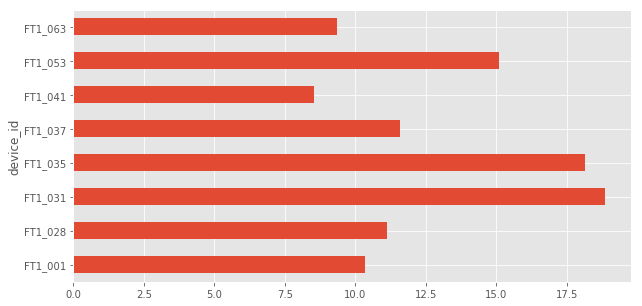

In [19]:
pm25_data.groupby('device_id')['s_d0'].mean().plot(kind='barh')

***
***
# Y5Bus
<img src="img/unnamed.png" alt="Y5Bus" style="width:300px;">

- <h3> Appdl </h3>

In [20]:
appdl_data = pd.read_csv('data/Y5Bus/sample_appdl.csv', na_values=["NaN"])
appdl_data[(appdl_data.Date == '2016-07-01')]
#作業系統下載次數

,Date,OS,value
182,2016-07-01,Android,526
426,2016-07-01,iOS,326


> Filter the July data and get the pivot table of it

In [21]:
Jul_appdl_data = appdl_data[(appdl_data.Date>='2016-07-01') & (appdl_data.Date<='2016-07-31')]
pivot_table = Jul_appdl_data.pivot_table('value',\
                                         index='Date',\
                                         columns='OS',\
                                         aggfunc=sum)
#每一天每個作業系統的總下載次數
pivot_table

OS,Android,iOS
Date,,
2016-07-01,526,326
2016-07-02,419,266
2016-07-03,514,305
2016-07-04,378,226
2016-07-05,330,187
2016-07-06,414,171
2016-07-07,204,181
2016-07-08,372,148
2016-07-09,376,256


> Plot the result

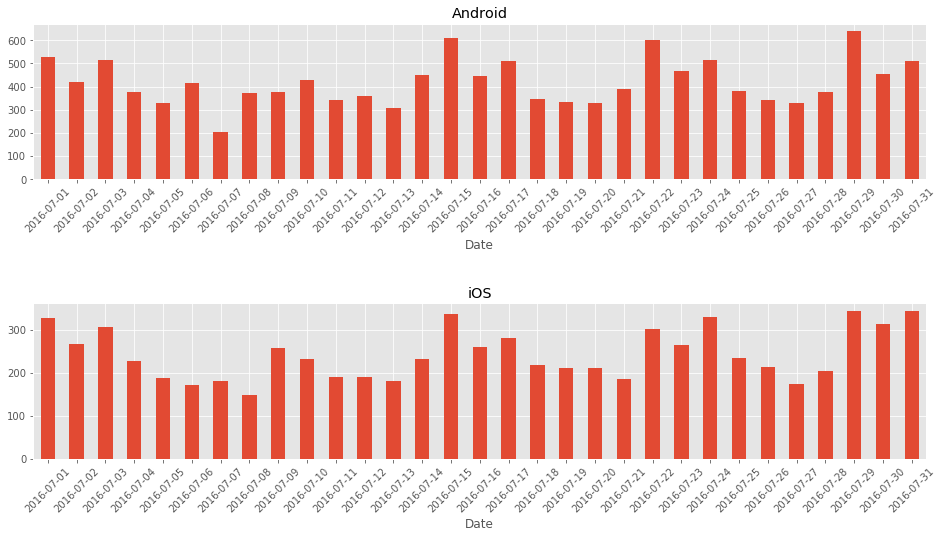

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(16,8))
fig.subplots_adjust(hspace=.8)

pivot_table['Android'].plot(kind='bar', rot=45, ax=axes[0], title='Android')
pivot_table['iOS'].plot(kind='bar', rot=45, ax=axes[1], title='iOS')

> Plot them in the same figure

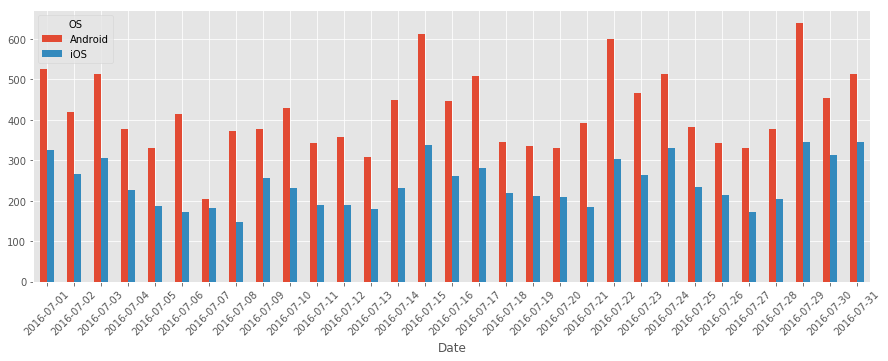

In [23]:
pivot_table.plot(kind='bar', rot=45, figsize=(15, 5))

- <h3> Gps </h3>

In [24]:
gps_data = pd.read_csv('data/Y5Bus/sample_gps_small.csv')
gps_data.head()

,ID,MacAddress,Longitude,Latitude,RSSI1,MNC1,IMSI1,CELLID1,RSSI2,MNC2,IMSI2,CELLID2,CreateTime,IsCheckPoint,IsUsed,Speed
0,59512535,001970C14035,120.618527,24.143759,-63,92,4.669243e+14,106603553,-150.0,0.0,NaN,21690747.0,2016-08-01 00:00:00,0,0,NaN
1,59512536,001970C11733,121.447935,25.071413,-61,92,4.669243e+14,28570135,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,94.0
2,59512537,001970C11D25,0.000000,0.000000,-75,1,4.660115e+14,181827085,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,0.0
3,59512538,001970C1170F,120.919453,24.693612,-45,92,4.669243e+14,106006541,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,96.0
4,59512539,001970A2F198,120.493055,23.889108,-44,92,4.669241e+14,131811607,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,96.0


In [25]:
gps_data[gps_data.MacAddress=="001970C14035"].count()

ID              34
MacAddress      34
Longitude       34
Latitude        34
RSSI1           34
MNC1            34
IMSI1           34
CELLID1         34
RSSI2           34
MNC2            34
IMSI2            0
CELLID2         34
CreateTime      34
IsCheckPoint    34
IsUsed          34
Speed            0
dtype: int64

- <h3> 請基於以上兩種資料集，利用 Pandas 等套件，做三種資料觀察和呈現，並敘述你的目的，以及對結果的理解或發現
</h3>
- More Visualization: https://pandas.pydata.org/pandas-docs/stable/visualization.html

1. Purpose :   
        To Find out the trend of the values of PM2.5 and PM10 during the time of the Database.  

    Result :   
        a). As you can see in the "PM2.5 V.S. Datatime" and "PM10 V.S. Datatime" figures below, the values of PM2.5 and PM10 both have peak during 2016-09-10 22:16:48 - 2016-09-10 22:24:03, and both figures show up a potential regularity, which is that there are more PM2.5 and PM10 during 22:00 - 07:00 than 07:00 - 18:00.  
        b). According to Environmental Protection Adminstration Executive Yuan R.O.C., if the value of PM2.5 is larger than 36 and the value of PM10 is larger than 55, then the environment is not adequate for sensitive groups to workout. In the fugure of "Critical PM2.5, PM10 V.S. Datatime", I take a stricter analysis on those data of "PM2.5 > 36 & PM10 > 55", I find out that the trend of PM2.5 is similar to the trend of PM10 and the peak is at the time of 2016-09-10 22:17:48.



max value of s_d0 = 79.0
max value of s_d1 = 81.0


,s_d0,s_d1
datatime,,
2016-09-10 22:17:48,79.0,81.0


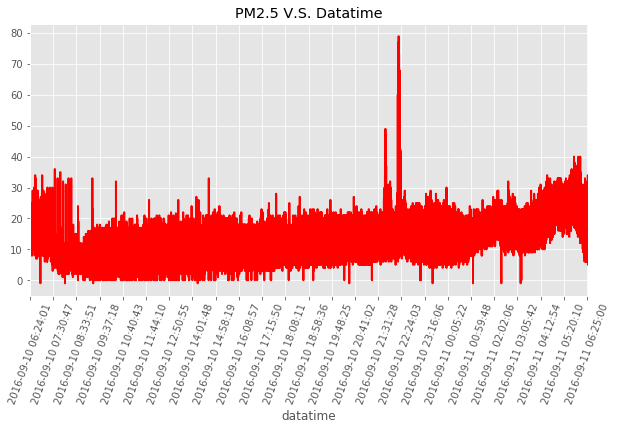

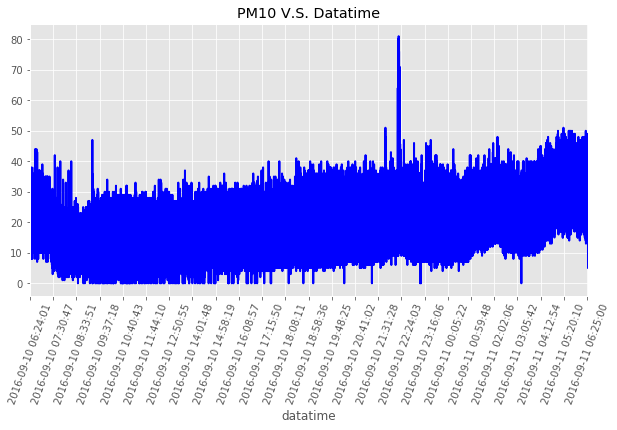

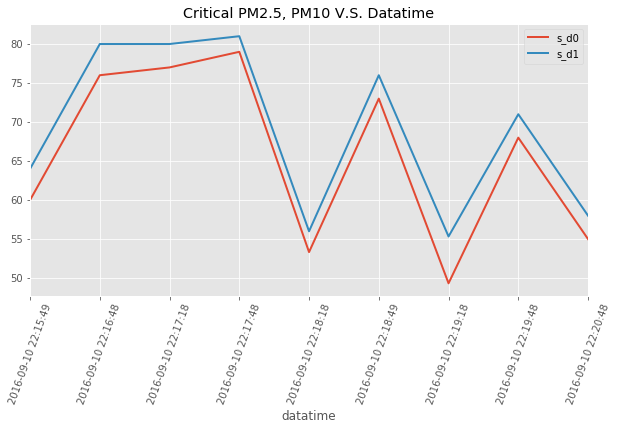

In [28]:
plt.figure(1)
pm25_datatime_data_sd0 = pm25_data.groupby('datatime')['s_d0'].mean()
size = len(pm25_datatime_data_sd0)
pm25_datatime_data_sd0.plot(title = 'PM2.5 V.S. Datatime', rot = 70, c = 'r', xticks = range(0, size, int(size/24)))

plt.figure(2)
pm25_datatime_data_sd1 = pm25_data.groupby('datatime')['s_d1'].mean()
size = len(pm25_datatime_data_sd1)
pm25_datatime_data_sd1.plot(title = 'PM10 V.S. Datatime', rot = 70, c = 'b', xticks = range(0, size, int(size/24)))

plt.figure(3)
pm25_datatime_data_sd0_sd1 = pm25_data.groupby('datatime')[['s_d0', 's_d1']].mean()
pm25_datatime_thresh_sd0_sd1 = pm25_datatime_data_sd0_sd1[(pm25_datatime_data_sd0_sd1.s_d0 > 36) & (pm25_datatime_data_sd0_sd1.s_d1>55)]
size = len(pm25_datatime_thresh_sd0_sd1)
pm25_datatime_thresh_sd0_sd1.plot(title = 'Critical PM2.5, PM10 V.S. Datatime', rot = 70, xticks = range(0, size, int(size/8)))

max_sd0= max(pm25_datatime_data_sd0_sd1['s_d0'])
max_sd1 = max(pm25_datatime_data_sd0_sd1['s_d1'])
print("max value of s_d0 = {x}".format(x= max_sd0))
print("max value of s_d1 = {x}".format(x= max_sd1))

pm25_datatime_thresh_sd0_sd1 = pm25_datatime_thresh_sd0_sd1[(pm25_datatime_thresh_sd0_sd1.s_d0 == max_sd0) | (pm25_datatime_thresh_sd0_sd1.s_d0 == max_sd1)]
pm25_datatime_thresh_sd0_sd1